In [2]:
import numpy as np # For vector operation
import pandas as pd # For Data manipulation
import matplotlib.pyplot as plt # For plotting
import seaborn as sns #For data visualization
from scipy import stats

In [3]:
dataset=pd.read_csv("load_regression.csv")
dataset.head()

,Input,Output
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040


In [4]:
dataset.describe()

,Input,Output
count,2160.000000,2160.000000
mean,6036.917148,6028.298499
std,1066.466517,1068.308193
min,3377.919600,3377.919600
25%,5263.054380,5260.014720
50%,5949.939600,5934.663360
75%,6746.759190,6738.770340
max,8841.669480,8841.669480


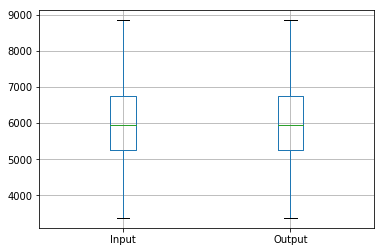

In [7]:
pd.DataFrame.boxplot(dataset,grid=True,vert=True)

In [9]:
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')

In [10]:
z = np.abs(stats.zscore(dataset))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [11]:
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b5adb5978>,
      dtype=object)

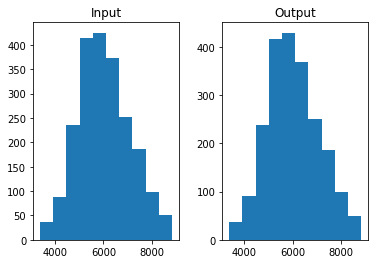

In [12]:
pd.DataFrame.hist(dataset,grid=False)

In [14]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
load_data=ms.fit_transform(dataset)
print(load_data)

[[0.39787738 0.28430002]
 [0.29380046 0.25579869]
 [0.27645431 0.24450087]
 ...
 [0.68414596 0.24629825]
 [0.51467861 0.32438447]
 [0.41730621 0.65165045]]


In [17]:
dataset=pd.DataFrame(data=load_data[0:,0:]) 
print(dataset[0].values)

[0.39787738 0.29380046 0.27645431 ... 0.68414596 0.51467861 0.41730621]


In [18]:
X=dataset.iloc[:,0:1].values
Y=dataset.iloc[:,1:].values
print(Y)

[[0.28430002]
 [0.25579869]
 [0.24450087]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_test[0:5])

[[0.65903969]
 [0.42629312]
 [0.20196285]
 [0.7751562 ]
 [0.60808536]]


In [26]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(X_train)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
x_poly_test = polynomial_features.fit_transform(X_test)
y_poly_pred = model.predict(x_poly_test)
print(y_test[0])
print(y_poly_pred[0])

[0.54480614]
[0.62446881]


In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_poly_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))

Mean Absolute Error: 0.09311031341036166
Mean Squared Error: 0.015900403435657105
Root Mean Squared Error: 0.12609680184547548


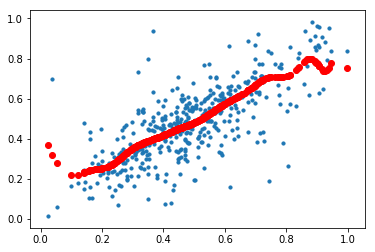

In [30]:
plt.scatter(X_test, y_test, s=10)
plt.scatter(X_test, y_poly_pred, color='r')
plt.show()